<a href="https://colab.research.google.com/github/satyhim/Machine_Learning/blob/main/Local_Outlier_Factor_(LOF)_For_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Local Outlier Factor (LOF) : Outlier Detection Technique

# Intro

Local Outlier Factor (LOF) is an unsupervised model for outlier detection. It compares the local density of each data point with its neighbors and identifies the data points with a lower density as anomalies or outliers.

In this tutorial, we will talk about
* What's the difference between novelty detection and outlier detection? 
* When to use novelty detection vs. outlier detection?
* How to use Local Outlier Factor (LOF) for novelty detection?
* How to use Local Outlier Factor (LOF) for anomaly or outlier detection?

Let's get started!


# Step 1: Import Libraries

The first step is to import libraries. We need to import `make_classification` from `sklearn` to create the modeling dataset. Import `pandas` and `numpy` for data processing, `Counter` will help us count the number of records.

`Matplotlib` is for visualization.

We also need the `train_test_split` to create a training and validation dataset. `LocalOutlierFactor` is for modeling, and `classification_report` is for model performance evaluation. 


In [ ]:
# Synthetic dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

# Step 2: Create Dataset With Anomalies

Using make_classification from the sklearn library, We created two classes with the ratio between the majority class and the minority class being 0.995:0.005. Two informative features were made as predictors. We did not include any redundant or repeated features in this dataset.

In [ ]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)

# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

# Check the target distribution
df['target'].value_counts(normalize = True)

0    0.9897
1    0.0103
Name: target, dtype: float64

The output shows that we have about 1% of the data in the minority class and 99% in the majority class, which means we have around 1% anomalies.

# Step 3: Train Test Split

In this step, we split the dataset into 80% training data and 20% validation data. random_state ensures that we have the same train test split every time. The seed number for random_state does not have to be 42, and it can be any number.

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79183 records for the majority class and 817 records for the minority class.


The train test split gives us 80,000 records for the training dataset and 20,000 for the validation dataset. Thus, we have 79,183 data points from the majority class and 817 from the minority class in the training dataset.

# Step 4: Outlier / Anomaly Detection vs. Novelty Detection

The local Outlier Factor (LOF) algorithm can be used for outlier/anomaly detection and novelty detection. The difference between outlier /anomaly detection and novelty detection lies in the training dataset.

Outlier/anomaly detection includes outliers in the training dataset. The algorithm fits the areas with high-density data and ignores the outliers and anomalies.

Novelty detection only includes the normal data points when training the model. Then the model will take a new dataset with outliers/anomalies for prediction. The outliers in novelty detection are also called novelties.

When to use novelty detection vs. outlier detection? That depends on what data is available. If we have the dataset with the outlier labels, we can use either of them. Otherwise, we can only use outlier detection because we cannot get the training dataset with only the normal data.

# Step 5: Novelty Detection Using Local Outlier Factor (LOF)

Python's `sklearn` library has the implementation for Local Outlier Factor (LOF). To use novelty detection, we need to set the hyperparameter novelty as True. `fit_predictfit` is not available because the algorithm fits and predicts on different datasets. We need to fit the training dataset with all normal data and predict the testing dataset that includes outliers.

In [ ]:
# Keep only the normal data for the training dataset
X_train_normal = X_train[np.where(y_train == 0)]

# Train the local outlier factor (LOF) model for novelty detection
lof_novelty = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(X_train_normal)

# Predict novelties
prediction_novelty = lof_novelty.predict(X_test)

# Change the anomalies' values to make it consistent with the true values
prediction_novelty = [1 if i==-1 else 0 for i in prediction_novelty]

# Check the model performance
print(classification_report(y_test, prediction_novelty))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.05      0.02      0.03       213

    accuracy                           0.99     20000
   macro avg       0.52      0.51      0.51     20000
weighted avg       0.98      0.99      0.98     20000



We can see that the Local Outlier Factor (LOF) novelty detection captured 2% of the outliers/anomalies.

# Step 6: Outlier Detection Using Local Outlier Factor (LOF)

Local Outlier Factor (LOF) for outlier detection train and predict on the same dataset. So if we would like to compare the model performance between novelty detection and outlier detection, we need to fit and predict on the testing dataset. We also need to set `novelty to `False` to enable the outlier detection algorithm.

In [ ]:
# The local outlier factor (LOF) model for outlier detection
lof_outlier = LocalOutlierFactor(n_neighbors=5, novelty=False)

# Predict novelties
prediction_outlier = lof_outlier.fit_predict(X_test)

# Change the anomalies' values to make it consistent with the true values
prediction_outlier = [1 if i==-1 else 0 for i in prediction_outlier]

# Check the model performance
print(classification_report(y_test, prediction_outlier))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19787
           1       0.06      0.03      0.04       213

    accuracy                           0.98     20000
   macro avg       0.53      0.51      0.52     20000
weighted avg       0.98      0.98      0.98     20000



We can see that the Local Outlier Factor (LOF) outlier/anomaly detection captured 3% of the outliers/anomalies, which is slightly better than the novelty detection result.

# Step 7: Visualization

This step will plot the data points and check the differences between actual, LOF novelty detection, and LOF outlier detection.

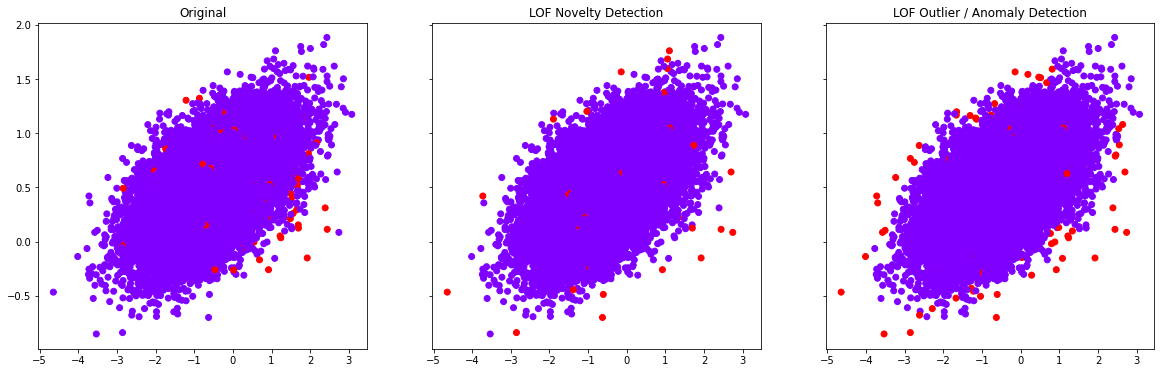

In [ ]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['prediction_novelty'] = prediction_novelty
df_test['prediction_outlier'] = prediction_outlier

# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')

# Local Outlier Factor (LOF) Novelty Detection
ax1.set_title('LOF Novelty Detection')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['prediction_novelty'], cmap='rainbow')

# Local Outlier Factor (LOF) Outlier / Anomaly Detection
ax2.set_title('LOF Outlier / Anomaly Detection')
ax2.scatter(df_test['feature1'], df_test['feature2'], c=df_test['prediction_outlier'], cmap='rainbow')

We can see that in this example, the outlier detection identified more outliers than the novelty detection.

# Step 8: Put All Code Toegther

In [ ]:
###### Step 1: Import Libraries

# Synthetic dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt

# Model and performance
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


###### Step 2: Create Dataset With Anomalies

# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)

# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

# Check the target distribution
df['target'].value_counts(normalize = True)


###### Step 3: Train Test Split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")


###### Step 4: Local Outlier Factor (LOF) Algorithm

# No code in this step


###### Step 5: Outlier / Anomaly Detection vs. Novelty Detection

# No code in this step


###### Step 6: Novelty Detection Using Local Outlier Factor (LOF)

# Keep only the normal data for the training dataset
X_train_normal = X_train[np.where(y_train == 0)]

# Train the local outlier factor (LOF) model for novelty detection
lof_novelty = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(X_train_normal)

# Predict novelties
prediction_novelty = lof_novelty.predict(X_test)

# Change the anomalies' values to make it consistent with the true values
prediction_novelty = [1 if i==-1 else 0 for i in prediction_novelty]

# Check the model performance
print(classification_report(y_test, prediction_novelty))


###### Step 7: Outlier Detection Using Local Outlier Factor (LOF)

# The local outlier factor (LOF) model for outlier detection
lof_outlier = LocalOutlierFactor(n_neighbors=5, novelty=False)

# Predict novelties
prediction_outlier = lof_outlier.fit_predict(X_test)

# Change the anomalies' values to make it consistent with the true values
prediction_outlier = [1 if i==-1 else 0 for i in prediction_outlier]

# Check the model performance
print(classification_report(y_test, prediction_outlier))


###### Step 8: Visualization

# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['prediction_novelty'] = prediction_novelty
df_test['prediction_outlier'] = prediction_outlier

# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')

# Local Outlier Factor (LOF) Novelty Detection
ax1.set_title('LOF Novelty Detection')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['prediction_novelty'], cmap='rainbow')

# Local Outlier Factor (LOF) Outlier / Anomaly Detection
ax2.set_title('LOF Outlier / Anomaly Detection')
ax2.scatter(df_test['feature1'], df_test['feature2'], c=df_test['prediction_outlier'], cmap='rainbow')



# Summary

This tutorial demonstrated how to use Local Outlier Factor (LOF) for outlier and novelty detection.

Using the `sklearn` library in Python, we covered

* What's the difference between novelty detection and outlier detection? 
* When to use novelty detection vs. outlier detection?
* How to use Local Outlier Factor (LOF) for novelty detection?
* How to use Local Outlier Factor (LOF) for anomaly or outlier detection?

# Recommended Tutorials

- [Multivariate Time Series Forecasting with Seasonality and Holiday Effect Using Prophet in Python](https://medium.com/p/multivariate-time-series-forecasting-with-seasonality-and-holiday-effect-using-prophet-in-python-d5d4150eeb57)
- [Four Oversampling And Under-Sampling Methods For Imbalanced Classification Using Python](https://medium.com/p/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037)
- [3 Ways for Multiple Time Series Forecasting Using Prophet in Python](https://medium.com/p/3-ways-for-multiple-time-series-forecasting-using-prophet-in-python-7a0709a117f9)
- [Databricks Mount To AWS S3 And Import Data](https://medium.com/grabngoinfo/databricks-mount-to-aws-s3-and-import-data-4100621a63fd)
- [Hyperparameter Tuning For XGBoost](https://medium.com/p/hyperparameter-tuning-for-xgboost-91449869c57e)
- [One-Class SVM For Anomaly Detection](https://medium.com/p/one-class-svm-for-anomaly-detection-6c97fdd6d8af)
- [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/grabngoinfo/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4)
- [Sentiment Analysis Without Modeling: TextBlob vs. VADER vs. Flair](https://medium.com/p/sentiment-analysis-without-modeling-textblob-vs-vader-vs-flair-657b7af855f4)
- [Recommendation System: User-Based Collaborative Filtering](https://medium.com/p/recommendation-system-user-based-collaborative-filtering-a2e76e3e15c4)
- [How to detect outliers | Data Science Interview Questions and Answers](https://medium.com/p/how-to-detect-outliers-data-science-interview-questions-and-answers-1e400284f6b4)
- [Causal Inference One-to-one Matching on Confounders Using R for Python Users](https://medium.com/grabngoinfo/causal-inference-one-to-one-matching-on-confounders-using-python-and-r-1baf7fb105f3)
- [Gaussian Mixture Model (GMM) for Anomaly Detection](https://medium.com/grabngoinfo/gaussian-mixture-model-gmm-for-anomaly-detection-e8360e6f4009)
- [Time Series Anomaly Detection Using Prophet in Python](https://medium.com/p/time-series-anomaly-detection-using-prophet-in-python-877d2b7b14b4)
- [How to Use R with Google Colab Notebook](https://medium.com/p/how-to-use-r-with-google-colab-notebook-610c3a2f0eab)

# References

* [Sklearn Local Outlier Factor (LOF)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor)
* [Sklearn Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection)
* [LOF Paper](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.35.8948)
* [LOF Algorithm](https://www.youtube.com/watch?v=CePgbdVdLvg)